#Question 1 - Implement Stack Using Queues

Implement a last-in-first-out (LIFO) stack using only two queues. The implemented stack should support all the functions of a normal stack (push, top, pop, and empty).

\
Implement the MyStack class:

`void push(int x)` Pushes element x to the top of the stack.

`int pop()` Removes the element on the top of the stack and returns it.

`int top()` Returns the element on the top of the stack.

`boolean empty()` Returns true if the stack is empty, false otherwise.

\
Notes:

You must use only standard operations of a queue, which means that only push to back, peek/pop from front, size and is empty operations are valid.
Depending on your language, the queue may not be supported natively. You may simulate a queue using a list or deque (double-ended queue) as long as you use only a queue's standard operations.


\
Example 1:

Input
```
["MyStack", "push", "push", "top", "pop", "empty"]

[[], [1], [2], [], [], []]
```
\
Output
```
[null, null, null, 2, 2, false]
```

\
Explanation
```
MyStack myStack = new MyStack();
myStack.push(1);
myStack.push(2);
myStack.top(); // return 2
myStack.pop(); // return 2
myStack.empty(); // return False
```


\
**Constraints:**

1 <= x <= 9

At most 100 calls will be made to push, pop, top, and empty.

All the calls to pop and top are valid.

In [ ]:
from collections import deque

class MyStack(object):

    def __init__(self):
        self.q1 = deque()
        self.q2 = deque()

    def push(self, x):
        self.q2.append(x)
        while self.q1:
            self.q2.append(self.q1.popleft())
        self.q1, self.q2 = self.q1, self.q2

    def pop(self):
        if not self.empty():
            return self.q1.popleft()
        return "Stack is empty"

    def top(self):
        if not self.empty():
            return self.q1[0]
        return "Stack is empty"

    def empty(self):
        return len(self.q1) == 0


# Interactive session
if __name__ == "__main__":
    stack = MyStack()
    while True:
        print("\nOptions: push <x>, pop, top, empty, quit")
        command = raw_input("Enter command: ").strip().split()

        if not command:
            continue

        action = command[0]

        if action == "push" and len(command) == 2:
            stack.push(int(command[1]))
            print("Pushed:", command[1])

        elif action == "pop":
            print("Popped:", stack.pop())

        elif action == "top":
            print("Top:", stack.top())

        elif action == "empty":
            print("Is empty?", stack.empty())

        elif action == "quit":
            break

        else:
            print("Invalid command")

# Question 2 - Implement Queue Using  Stacks

Implement a first in first out (FIFO) queue using only two stacks. The implemented queue should support all the functions of a normal queue (push, peek, pop, and empty).

\
Implement the MyQueue class:

void push(int x) Pushes element x to the back of the queue.

int pop() Removes the element from the front of the queue and returns it.

int peek() Returns the element at the front of the queue.

boolean empty() Returns true if the queue is empty, false otherwise.

\
**Notes:**

You must use only standard operations of a stack, which means only push to top, peek/pop from top, size, and is empty operations are valid.
Depending on your language, the stack may not be supported natively. You may simulate a stack using a list or deque (double-ended queue) as long as you use only a stack's standard operations.

\
**Example 1:**

Input
```
["MyQueue", "push", "push", "peek", "pop", "empty"]

[[], [1], [2], [], [], []]
```

\
Output
```
[null, null, null, 1, 1, false]
```

\
Explanation
```
MyQueue myQueue = new MyQueue();
myQueue.push(1); // queue is: [1]
myQueue.push(2); // queue is: [1, 2] (leftmost is front of the queue)
myQueue.peek(); // return 1
myQueue.pop(); // return 1, queue is [2]
myQueue.empty(); // return false
```

**Constraints:**

1 <= x <= 9

At most 100 calls will be made to push, pop, peek, and empty.

All the calls to pop and peek are valid.

In [ ]:
class MyQueue(object):

    def __init__(self):
        self.stack_in = []
        self.stack_out = []

    def push(self, x):
        self.stack_in.append(x)

    def pop(self):
        self.peek()
        return self.stack_out.pop()

    def peek(self):
        if not self.stack_out:
            while self.stack_in:
                self.stack_out.append(self.stack_in.pop())
        return self.stack_out[-1]

    def empty(self):
        return not self.stack_in and not self.stack_out


# ===== User Input Simulation =====

# Initialize queue
queue = MyQueue()

# Read commands
commands = input("Enter commands (e.g. push 1, pop, peek, empty), separated by commas:\n").split(',')

for cmd in commands:
    parts = cmd.strip().split()
    if parts[0] == "push":
        queue.push(int(parts[1]))
        print("null")
    elif parts[0] == "pop":
        print(queue.pop())
    elif parts[0] == "peek":
        print(queue.peek())
    elif parts[0] == "empty":
        print(queue.empty())

# Question 3 - Binary Tree Right Side View

Given the root of a binary tree, imagine yourself standing on the right side of it, return the values of the nodes you can see ordered from top to bottom.


\
**Example 1:**

Input:

root = [1,2,3,null,5,null,4]

Output:

[1,3,4]

Explanation:

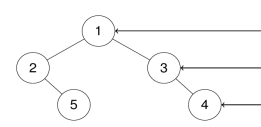

\
**Example 2:**

Input:

root = [1,2,3,4,null,null,null,5]

Output:

[1,3,4,5]

Explanation:

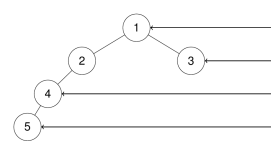

\
**Example 3:**

Input: root = [1,null,3]

Output: [1,3]

Example 4:

Input: root = []

Output: []


\
**Constraints:**

The number of nodes in the tree is in the range [0, 100].

-100 <= Node.val <= 100

In [ ]:
from collections import deque

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree_from_list(values):
    if not values or values[0] is None:
        return None

    root = TreeNode(values[0])
    queue = deque([root])
    i = 1

    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1

    return root

class Solution(object):
    def rightSideView(self, root):
        if not root:
            return []

        queue = deque([root])
        result = []

        while queue:
            level_size = len(queue)
            for i in range(level_size):
                node = queue.popleft()
                if i == level_size - 1:
                    result.append(node.val)
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)

        return result

# -------- User Input & Execution --------
if __name__ == "__main__":
    input_str = input("Enter tree values level-wise (use 'null' for missing nodes): ")
    tokens = input_str.strip().split()
    values = [int(x) if x != 'null' else None for x in tokens]

    root = build_tree_from_list(values)
    sol = Solution()
    output = sol.rightSideView(root)
    print("Right side view:", output)

# Question 4 - Diameter of Binary Tree

Given the root of a binary tree, return the length of the diameter of the tree.

The diameter of a binary tree is the length of the longest path between any two nodes in a tree. This path may or may not pass through the root.

The length of a path between two nodes is represented by the number of edges between them.


\
Example 1:

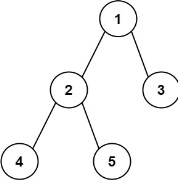

Input: root = [1,2,3,4,5]

Output: 3

Explanation: 3 is the length of the path [4,2,1,3] or [5,2,1,3].

\
**Example 2:**

Input: root = [1,2]

Output: 1


**Constraints:**

The number of nodes in the tree is in the range [1, 104].

-100 <= Node.val <= 100

In [ ]:
from collections import deque

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree_from_list(values):
    if not values or values[0] is None:
        return None

    root = TreeNode(values[0])
    queue = deque([root])
    i = 1

    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1

    return root

class Solution(object):
    def diameterOfBinaryTree(self, root):
        self.diameter = 0

        def dfs(node):
            if not node:
                return 0
            left = dfs(node.left)
            right = dfs(node.right)
            self.diameter = max(self.diameter, left + right)
            return 1 + max(left, right)

        dfs(root)
        return self.diameter

# -------- User Input & Execution --------
if __name__ == "__main__":
    input_str = input("Enter tree values level-wise (use 'null' for missing nodes): ")
    tokens = input_str.strip().split()
    values = [int(x) if x != 'null' else None for x in tokens]

    root = build_tree_from_list(values)
    sol = Solution()
    output = sol.diameterOfBinaryTree(root)
    print("Diameter of the binary tree:", output)


# Question 5 - Binary Tree Zigzag Level Order Traversal

Given the root of a binary tree, return the zigzag level order traversal of its nodes' values. (i.e., from left to right, then right to left for the next level and alternate between).


\
**Example 1:**

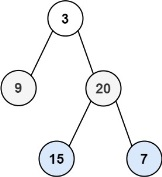

Input: root = [3,9,20,null,null,15,7]

Output: [[3],[20,9],[15,7]]

\
**Example 2:**

Input: root = [1]

Output: [[1]]

\
**Example 3:**

Input: root = []

Output: []

\
**Constraints:**

The number of nodes in the tree is in the range [0, 2000].

-100 <= Node.val <= 100

In [ ]:
from collections import deque

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree(values):
    if not values or values[0] is None:
        return None

    root = TreeNode(values[0])
    queue = deque([root])
    i = 1

    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1

    return root

class Solution(object):
    def zigzagLevelOrder(self, root):
        if not root:
            return []

        result = []
        queue = deque([root])
        left_to_right = True

        while queue:
            level_size = len(queue)
            level = deque()

            for _ in range(level_size):
                node = queue.popleft()
                if left_to_right:
                    level.append(node.val)
                else:
                    level.appendleft(node.val)

                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)

            result.append(list(level))
            left_to_right = not left_to_right

        return result

# -------- User Input and Execution --------
if __name__ == "__main__":
    input_str = input("Enter tree values level-wise (use 'null' for missing nodes): ")
    tokens = input_str.strip().split()
    values = [int(x) if x != 'null' else None for x in tokens]

    root = build_tree(values)
    sol = Solution()
    output = sol.zigzagLevelOrder(root)
    print("Zigzag Level Order Traversal:", output)

# Question 6 - Sum Root to Leaf Numbers

You are given the root of a binary tree containing digits from 0 to 9 only.

Each root-to-leaf path in the tree represents a number.

For example, the root-to-leaf path 1 -> 2 -> 3 represents the number 123.
Return the total sum of all root-to-leaf numbers. Test cases are generated so that the answer will fit in a 32-bit integer.

A leaf node is a node with no children.


\
**Example 1:**

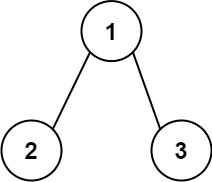

Input: root = [1,2,3]

Output: 25

Explanation:

The root-to-leaf path 1->2 represents the number 12.

The root-to-leaf path 1->3 represents the number 13.

Therefore, sum = 12 + 13 = 25.

\
**Example 2:**

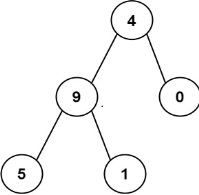

Input: root = [4,9,0,5,1]

Output: 1026

\
**Explanation:**
The root-to-leaf path 4->9->5 represents the number 495.
The root-to-leaf path 4->9->1 represents the number 491.
The root-to-leaf path 4->0 represents the number 40.
Therefore, sum = 495 + 491 + 40 = 1026.

\
**Constraints:**

The number of nodes in the tree is in the range [1, 1000].

0 <= Node.val <= 9

The depth of the tree will not exceed 10.

In [ ]:
from collections import deque

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree(values):
    if not values or values[0] is None:
        return None

    root = TreeNode(values[0])
    queue = deque([root])
    i = 1

    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1

    return root

class Solution(object):
    def sumNumbers(self, root):
        def dfs(node, current):
            if not node:
                return 0
            current = current * 10 + node.val
            if not node.left and not node.right:
                return current
            return dfs(node.left, current) + dfs(node.right, current)

        return dfs(root, 0)

# -------- User Input and Execution --------
if __name__ == "__main__":
    input_str = input("Enter tree values level-wise (use 'null' for missing nodes): ")
    tokens = input_str.strip().split()
    values = [int(x) if x != 'null' else None for x in tokens]

    root = build_tree(values)
    sol = Solution()
    output = sol.sumNumbers(root)
    print("Sum of all root-to-leaf numbers:", output)


#Question 7 - Flatten Binary Tree to Linked List

Given the root of a binary tree, flatten the tree into a "linked list":

The "linked list" should use the same TreeNode class where the right child pointer points to the next node in the list and the left child pointer is always null.
The "linked list" should be in the same order as a pre-order traversal of the binary tree.

\
**Example 1:**

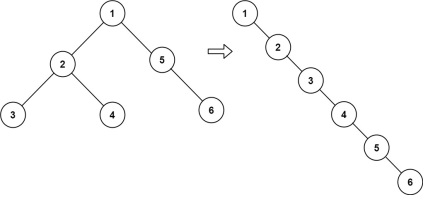

Input: root = [1,2,5,3,4,null,6]

Output: [1,null,2,null,3,null,4,null,5,null,6]

\
**Example 2:**

Input: root = []

Output: []

\
**Example 3:**

Input: root = [0]

Output: [0]


\
**Constraints:**

The number of nodes in the tree is in the range [0, 2000].

-100 <= Node.val <= 100

In [ ]:
from collections import deque

class TreeNode(object):
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def build_tree(values):
    if not values or values[0] is None:
        return None
    root = TreeNode(values[0])
    queue = deque([root])
    i = 1
    while queue and i < len(values):
        node = queue.popleft()
        if i < len(values) and values[i] is not None:
            node.left = TreeNode(values[i])
            queue.append(node.left)
        i += 1
        if i < len(values) and values[i] is not None:
            node.right = TreeNode(values[i])
            queue.append(node.right)
        i += 1
    return root

def print_linked_list(root):
    while root:
        if root.right:
            print str(root.val) + " ->",
        else:
            print str(root.val)
        root = root.right
    print()

class Solution(object):
    def flatten(self, root):
        def helper(node):
            if not node:
                return None
            if not node.left and not node.right:
                return node
            left_tail = helper(node.left)
            right_tail = helper(node.right)
            if left_tail:
                left_tail.right = node.right
                node.right = node.left
                node.left = None
            return right_tail if right_tail else left_tail
        helper(root)

# -------- User Input & Execution --------
if __name__ == "__main__":
    input_str = input("Enter tree values level-wise (use 'null' for missing): ")
    tokens = input_str.strip().split()
    values = [int(x) if x != 'null' else None for x in tokens]

    root = build_tree(values)
    Solution().flatten(root)
    print("Flattened linked list:")
    print_linked_list(root)